Version 1.0.2

# Pandas basics 

Hi! In this programming assignment you need to refresh your `pandas` knowledge. You will need to do several [`groupby`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)s and [`join`]()`s to solve the task. 

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline 

from grader import Grader

In [3]:
DATA_FOLDER = '../readonly/final_project_data/'

transactions    = pd.read_csv(os.path.join(DATA_FOLDER, 'sales_train.csv.gz'))
items           = pd.read_csv(os.path.join(DATA_FOLDER, 'items.csv'))
item_categories = pd.read_csv(os.path.join(DATA_FOLDER, 'item_categories.csv'))
shops           = pd.read_csv(os.path.join(DATA_FOLDER, 'shops.csv'))

The dataset we are going to use is taken from the competition, that serves as the final project for this course. You can find complete data description at the [competition web page](https://www.kaggle.com/c/competitive-data-science-final-project/data). To join the competition use [this link](https://www.kaggle.com/t/1ea93815dca248e99221df42ebde3540).

## Grading

We will create a grader instace below and use it to collect your answers. When function `submit_tag` is called, grader will store your answer *locally*. The answers will *not* be submited to the platform immediately so you can call `submit_tag` function as many times as you need. 

When you are ready to push your answers to the platform you should fill your credentials and run `submit` function in the <a href="#Authorization-&-Submission">last paragraph</a>  of the assignment.

In [4]:
grader = Grader()

# Task

Let's start with a simple task. 

<ol start="0">
  <li><b>Print the shape of the loaded dataframes and use [`df.head`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) function to print several rows. Examine the features you are given.</b></li>
</ol>

In [5]:
print(transactions.shape)
print(transactions.head)

(2935849, 6)
<bound method NDFrame.head of                date  date_block_num  shop_id  item_id  item_price  \
0        02.01.2013               0       59    22154      999.00   
1        03.01.2013               0       25     2552      899.00   
2        05.01.2013               0       25     2552      899.00   
3        06.01.2013               0       25     2554     1709.05   
4        15.01.2013               0       25     2555     1099.00   
5        10.01.2013               0       25     2564      349.00   
6        02.01.2013               0       25     2565      549.00   
7        04.01.2013               0       25     2572      239.00   
8        11.01.2013               0       25     2572      299.00   
9        03.01.2013               0       25     2573      299.00   
10       03.01.2013               0       25     2574      399.00   
11       05.01.2013               0       25     2574      399.00   
12       07.01.2013               0       25     2574      3

In [6]:
print(items.shape)
print(items.head)

(22170, 3)
<bound method NDFrame.head of                                                item_name  item_id  \
0              ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D        0   
1      !ABBYY FineReader 12 Professional Edition Full...        1   
2          ***В ЛУЧАХ СЛАВЫ   (UNV)                    D        2   
3        ***ГОЛУБАЯ ВОЛНА  (Univ)                      D        3   
4            ***КОРОБКА (СТЕКЛО)                       D        4   
5      ***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ  (UNI)         ...        5   
6               ***УДАР ПО ВОРОТАМ (UNI)               D        6   
7             ***УДАР ПО ВОРОТАМ-2 (UNI)               D        7   
8               ***ЧАЙ С МУССОЛИНИ                     D        8   
9          ***ШУГАРЛЭНДСКИЙ ЭКСПРЕСС (UNI)             D        9   
10             *ЗА ГРАНЬЮ СМЕРТИ                       D       10   
11             *ЛИНИЯ СМЕРТИ                           D       11   
12                       *МИХЕЙ И ДЖУМАНДЖИ  Сука любовь      

In [7]:
print(item_categories.shape)
print(item_categories.head)

(84, 2)
<bound method NDFrame.head of                           item_category_name  item_category_id
0                    PC - Гарнитуры/Наушники                 0
1                           Аксессуары - PS2                 1
2                           Аксессуары - PS3                 2
3                           Аксессуары - PS4                 3
4                           Аксессуары - PSP                 4
5                        Аксессуары - PSVita                 5
6                      Аксессуары - XBOX 360                 6
7                      Аксессуары - XBOX ONE                 7
8                             Билеты (Цифра)                 8
9                            Доставка товара                 9
10                     Игровые консоли - PS2                10
11                     Игровые консоли - PS3                11
12                     Игровые консоли - PS4                12
13                     Игровые консоли - PSP                13
14               

In [8]:
print(shops.shape)
print(shops.head)

(60, 2)
<bound method NDFrame.head of                                           shop_name  shop_id
0                     !Якутск Орджоникидзе, 56 фран        0
1                     !Якутск ТЦ "Центральный" фран        1
2                                  Адыгея ТЦ "Мега"        2
3                    Балашиха ТРК "Октябрь-Киномир"        3
4                          Волжский ТЦ "Волга Молл"        4
5                            Вологда ТРЦ "Мармелад"        5
6                        Воронеж (Плехановская, 13)        6
7                            Воронеж ТРЦ "Максимир"        7
8                      Воронеж ТРЦ Сити-Парк "Град"        8
9                                 Выездная Торговля        9
10                       Жуковский ул. Чкалова 39м?       10
11                       Жуковский ул. Чкалова 39м²       11
12                              Интернет-магазин ЧС       12
13                              Казань ТЦ "Бехетле"       13
14                          Казань ТЦ "ПаркХаус

Now use your `pandas` skills to get answers for the following questions. 
The first question is:

1. ** What was the maximum total revenue among all the shops in September, 2014?** 


* Hereinafter *revenue* refers to total sales minus value of goods returned.

*Hints:*

* Sometimes items are returned, find such examples in the dataset. 
* It is handy to split `date` field into [`day`, `month`, `year`] components and use `df.year == 14` and `df.month == 9` in order to select target subset of dates.
* You may work with `date` feature as with srings, or you may first convert it to `pd.datetime` type with `pd.to_datetime` function, but do not forget to set correct `format` argument.

In [9]:
#Created new data frame for the task
test_transactions = pd.DataFrame()
test_transactions = transactions.copy()

In [10]:
#Split the year and month
test_transactions['month'] = [d.split('.')[1] for d in transactions.date]
test_transactions['year'] = [d.split('.')[2] for d in transactions.date]

#Deleting unwanted columns
test_transactions.drop(['date', 'item_id', 'date_block_num'], axis=1, inplace=True)

#Selection rows with month september and year 2014
test_transactions = test_transactions.loc[(test_transactions['month'] == '09') & (test_transactions['year'] == '2014')]

#Deleting unwanted columns
test_transactions.drop(['month', 'year'], axis=1, inplace=True)

#Created the item_money that has been earned per day from the item
test_transactions['item_money'] = test_transactions['item_cnt_day'] * test_transactions['item_price']

#Deleting unwanted columns
test_transactions.drop(['item_price', 'item_cnt_day'], axis=1, inplace=True)

#Grouping by with the shops ids
test_transactions = test_transactions.groupby('shop_id').sum()

#Getting the greatest money
x = test_transactions.max()


In [11]:
max_revenue = x[0]
grader.submit_tag('max_revenue', max_revenue)

Current answer for task max_revenue is: 7982852.2


Great! Let's move on and answer another question:

<ol start="2">
  <li><b>What item category generated the highest revenue in summer 2014?</b></li>
</ol>

* Submit `id` of the category found.
    
* Here we call "summer" the period from June to August.

*Hints:*

* Note, that for an object `x` of type `pd.Series`: `x.argmax()` returns **index** of the maximum element. `pd.Series` can have non-trivial index (not `[1, 2, 3, ... ]`).

In [12]:
#Created new data frame for the task
test_revenue = pd.DataFrame()
test_revenue = transactions.copy()

In [13]:
#Item which generated the greatest revenue in the summer

#Split the year and month
test_revenue['month'] = [d.split('.')[1] for d in transactions.date]
test_revenue['year'] = [d.split('.')[2] for d in transactions.date]

#Deleting unwanted columns
test_revenue.drop(['date', 'date_block_num', 'shop_id'], axis=1, inplace=True)

#Selection rows with month september and year 2014
test_revenue = test_revenue.loc[((test_revenue['month'] == '06') | (test_revenue['month'] == '07') | (test_revenue['month'] == '08') ) & (test_revenue['year'] == '2014')]

#Deleting unwanted columns
test_revenue.drop(['month', 'year'], axis=1, inplace=True)

#Created the item_money that has been earned per day from the item
test_revenue['item_money'] = test_revenue['item_cnt_day'] * test_revenue['item_price']

#Deleting unwanted columns
test_revenue.drop(['item_price', 'item_cnt_day'], axis=1, inplace=True)

#Joining to get item categories
test_revenue = pd.merge(test_revenue, items, on = 'item_id')

#Deleting unwanted columns
test_revenue.drop(['item_id', 'item_name'], axis=1, inplace=True)

#Grouping by with the shops ids
test_revenue = test_revenue.groupby('item_category_id').sum()

#Getting index of the largest element
print(test_revenue.loc[test_revenue['item_money'].idxmax()])

print(test_revenue.head)


item_money    32157302.43
Name: 20, dtype: float64
<bound method NDFrame.head of                    item_money
item_category_id             
2                  2755520.00
3                  6854669.80
4                    38833.20
5                   418233.10
6                  3360382.50
8                   433200.00
9                   291426.84
11                 4970925.00
12                31385229.70
13                    4686.00
14                 2337794.30
15                 5047875.80
16                  191141.00
17                  167175.00
19                26237112.15
20                32157302.43
21                  991094.01
22                 2958475.70
23                19896624.03
25                 1032434.35
28                 8868913.27
29                 2286658.00
30                15876623.34
31                 1209713.95
32                  979500.00
33                 1175955.70
34                  248880.00
35                 3658967.10
37                 

In [14]:
category_id_with_max_revenue = 20 # PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('category_id_with_max_revenue', category_id_with_max_revenue)

Current answer for task category_id_with_max_revenue is: 20


<ol start="3">
  <li><b>How many items are there, such that their price stays constant (to the best of our knowledge) during the whole period of time?</b></li>
</ol>

* Let's assume, that the items are returned for the same price as they had been sold.

In [15]:
# Make dummy data table
test_item = pd.DataFrame()
test_item = transactions.copy()


In [16]:
#Finding Items with constant prices
# Getting Necessary columns
test_item = test_item.loc[:,["item_id", "item_price"]]

#Getting unique values
test_item = test_item.drop_duplicates()

#Grouping by item_id
test_item = test_item.groupby('item_id').count()

#Getting whose item price is 1
print(test_item[test_item["item_price"]==1].sum())

print(test_item.head)

item_price    5926
dtype: int64
<bound method NDFrame.head of          item_price
item_id            
0                 1
1                 1
2                 1
3                 2
4                 1
5                 1
6                 1
7                 1
8                 1
9                 1
10                1
11                1
12                1
13                1
14                1
15                1
16                1
17                1
18                1
19                1
20                1
21                1
22                1
23                1
24                1
25                1
26                1
27               11
28               11
29                6
...             ...
22140            41
22141             2
22142             1
22143             3
22144             4
22145             6
22146             6
22147             6
22148             1
22149             4
22150             6
22151             5
22152             2
22153             

In [17]:
# YOUR CODE GOES HERE

num_items_constant_price = 5926 # PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('num_items_constant_price', num_items_constant_price)

Current answer for task num_items_constant_price is: 5926


Remember, the data can sometimes be noisy.

<ol start="4">
  <li><b>What was the variance of the number of sold items per day sequence for the shop with `shop_id = 25` in December, 2014? Do not count the items, that were sold but returned back later.</b></li>
</ol>

* Fill `total_num_items_sold` and `days` arrays, and plot the sequence with the code below.
* Then compute variance. Remember, there can be differences in how you normalize variance (biased or unbiased estimate, see [link](https://math.stackexchange.com/questions/496627/the-difference-between-unbiased-biased-estimator-variance)). Compute ***unbiased*** estimate (use the right value for `ddof` argument in `pd.var` or `np.var`). 
* If there were no sales at a given day, ***do not*** impute missing value with zero, just ignore that day

In [26]:
#Created new data frame for the task
test_var = pd.DataFrame()
test_var = transactions.copy()

#Split the year and month
test_var['month'] = [d.split('.')[1] for d in transactions.date]
test_var['year'] = [d.split('.')[2] for d in transactions.date]
test_var['day'] = [d.split('.')[0] for d in transactions.date]

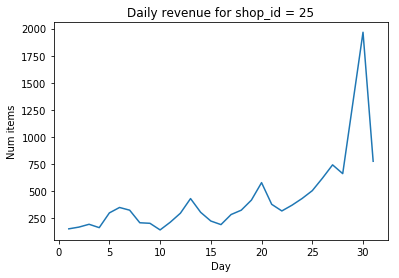

Current answer for task total_num_items_sold_var is: 117167.702299


In [27]:
shop_id = 25



test_var = test_var[(test_var.shop_id == shop_id)  & (test_var.year == '2014') & (test_var.month == '12')]
test_var = test_var["item_cnt_day"].groupby(test_var['day']).sum().reset_index()


total_num_items_sold = test_var.item_cnt_day # YOUR CODE GOES HERE
days = test_var.day# YOUR CODE GOES HERE

# Plot it
plt.plot(days, total_num_items_sold)
plt.ylabel('Num items')
plt.xlabel('Day')
plt.title("Daily revenue for shop_id = 25")
plt.show()

total_num_items_sold_var = np.var(test_var.item_cnt_day, ddof = 1)
grader.submit_tag('total_num_items_sold_var', total_num_items_sold_var)

## Authorization & Submission
To submit assignment to Cousera platform, please, enter your e-mail and token into the variables below. You can generate token on the programming assignment page. *Note:* Token expires 30 minutes after generation.

In [28]:
STUDENT_EMAIL = "talha.javed6645@gmail.com"
STUDENT_TOKEN = "Z9ZHKhASN2FvMr1v"
grader.status()

You want to submit these numbers:
Task max_revenue: 7982852.2
Task category_id_with_max_revenue: 20
Task num_items_constant_price: 5926
Task total_num_items_sold_var: 117167.702299


In [29]:
grader.submit(STUDENT_EMAIL, STUDENT_TOKEN)

Submitted to Coursera platform. See results on assignment page!


Well done! :)